- 온라인, 오프라인 카드 사용 내역 데이터를 확인 
    1. csv폴더 안에 있는 오프라인.csv, 온라인.csv 파일 로드 
    2. 두개의 데이터프레임을 단순한 행 결합(유니언 결합)
        - 두개의 데이터프레임의 구조 파악 
        - 두개의 데이터프레임의 구조를 같은 형태로 변환
        - 유니언 결합
    3. 기준년월 컬럼의 데이터를 시계열데이터로 변경 
    4. 기준년월, 업종별 총이용금액의 합계를 그래프 표시

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
offline = pd.read_csv("../../csv/card/오프라인.csv", 
                      encoding='CP949')

In [ ]:
online = pd.read_csv('../../csv/card/온라인.csv')

In [ ]:
offline.info()

In [ ]:
online.info()

In [ ]:
# offline의 컬럼의 이름을 변경 
offline.columns = ['기준년월', '업종', '성별', '연령대', 
                   '총이용건수', '총이용금액']

In [ ]:
offline.head(1)

In [ ]:
# online의 컬럼의 이름을 변경 
online.columns = ['기준년월', '성별', '연령대', 
                  '총이용건수', '총이용금액']

In [ ]:
online.head(1)

In [ ]:
# online 데이터프레임에 업종 컬럼을 추가 -> 데이터 '온라인'
online['업종'] = '온라인'

In [ ]:
online['업종'].value_counts()

In [ ]:
offline.info()

In [ ]:
online.info()

In [ ]:
df = pd.concat([offline, online], axis=0)
df.info()

In [ ]:
df.head(1)

In [ ]:
df

In [ ]:
## pandas에서 지수표현식을 없애기 
pd.options.display.float_format = '{:2f}'.format

In [ ]:
# 기준년월 데이터를 시계열 변경 
df['기준년월'] = pd.to_datetime(
    df['기준년월'], 
    format = '%Y%m'
)

In [ ]:
# 성별 컬럼의 데이터를 1은 남자 2는 여자 변경
df2 = df.copy()

In [ ]:
## replace()
df2['성별'].replace(
    {
        1 : '남자', 
        2 : '여자', 
        9 : '무관'
    }
)

In [ ]:
## map() + (일반함수 | lambda함수)
def change(x):
    # x에 입력되는 데이터들을 1, 2, 9, -
    # x가 만약에 1이라면 -> '남자' 되돌려준다
    if x == 1:
        return '남자'
    elif x == 2:
        return '여자'

df2['성별'].map(change)

In [ ]:
# if 구문을 한줄로 표시 : 
# "참인경우 데이터" if (조건식) else "거짓인경우 데이터"
df['성별'] = df['성별'].map(
    lambda x : "여자" if (x==2) else ("남자" if (x==1) else "무관")
)

In [ ]:
df2.reset_index(drop=True, inplace=True)


In [ ]:
# for문 
for i in range(len(df2)):
    # print(df2['성별'][i])
    data = df2['성별'][i]
    # 조건문을 사용
    if data == 1:
        df2.loc[i, '성별'] = '남자'
    elif data == 2:
        df2.loc[i, '성별'] = '여자'
    else:
        df2.loc[i, '성별'] = '무관'

In [ ]:
df2['성별'].value_counts()

In [ ]:
## 기준년월, 업종별 총이용금액의 합계 그래프 표시 
group_data = df[
    ['기준년월', '업종', '총이용금액']
    ].groupby(['기준년월', '업종']).sum()
group_data

In [ ]:
import platform

In [ ]:
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

In [ ]:
group_data.plot()

In [ ]:
group_data2 = df.groupby(['기준년월', '업종']).sum()['총이용금액']

In [ ]:
group_data2.unstack().plot()

In [ ]:
## 기준년월 별 합산 데이터를 확인 
group_data3 = group_data2.unstack()

In [ ]:
group_data3['All'] = group_data3.sum(axis=1)

In [ ]:
group_data3.plot()

In [ ]:
pivot_data = df.pivot_table(
    index = '기준년월', 
    columns = '업종', 
    values = '총이용금액', 
    aggfunc= 'sum', 
    margins= True
)
pivot_data

In [60]:
pivot_data.tail(3)

업종,백화점,슈퍼마켓,온라인,편의점,할인점,All
기준년월,,,,,,
2021-08-01 00:00:00,388967756935.000000,206468450346.000000,1254467251455.000000,72188734225.000000,188429570418.000000,2110521763379.000000
2021-09-01 00:00:00,422081236462.000000,181809468875.000000,1195275255905.000000,61362822910.000000,151079584433.000000,2011608368585.000000
All,13793108647313.000000,6222005083279.000000,32165434974699.000000,1931786572981.000000,6251957786355.000000,60364293064627.000000


In [ ]:
pivot_data.drop('All', axis=0).plot()

In [ ]:
pivot_data.iloc[:-1].plot()

In [67]:
pivot_data['오프라인'] = pivot_data['All'] - pivot_data['온라인']

In [89]:
data = pivot_data.iloc[:-1]

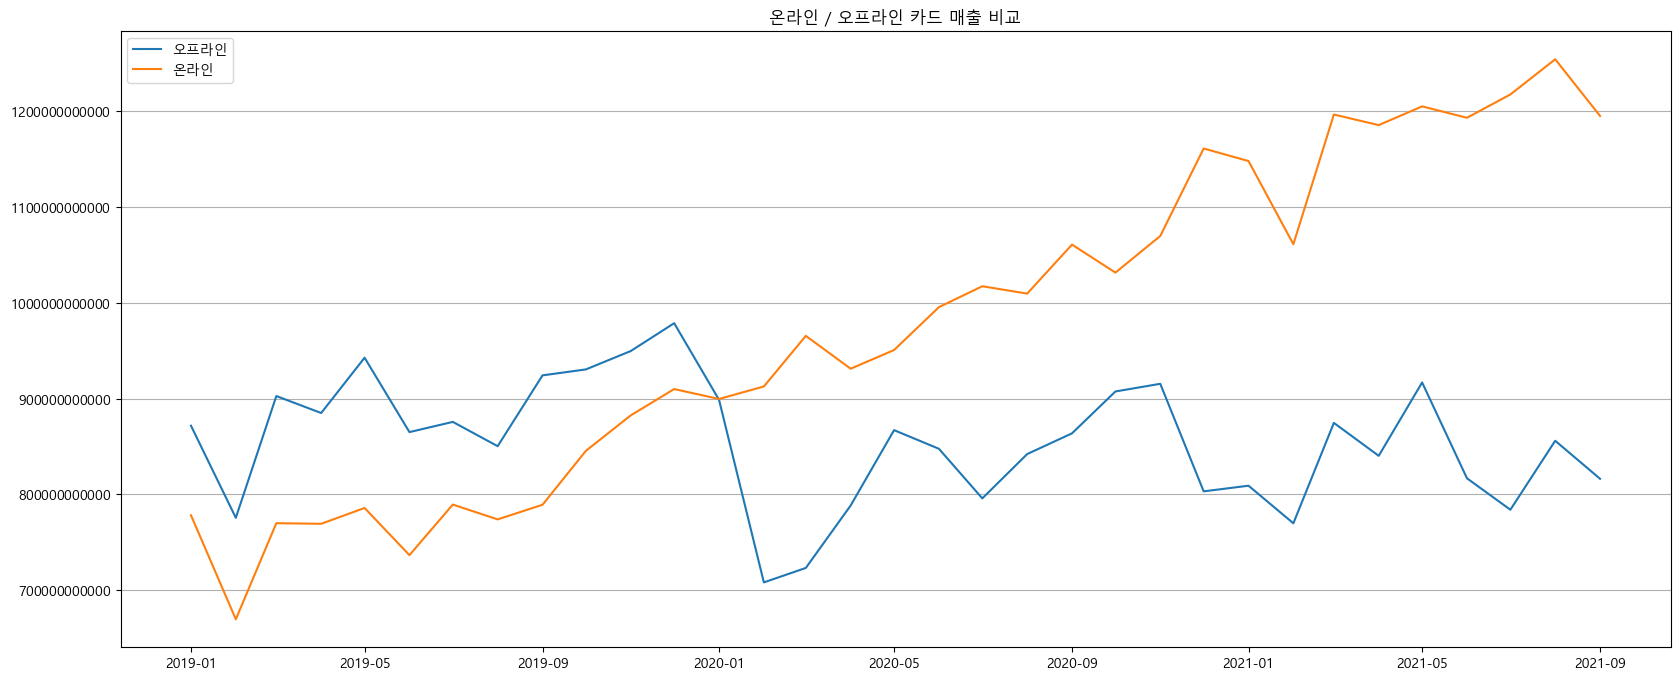

In [90]:
x = data.index
y1 = data['오프라인']
y2 = data['온라인']

# 그래프의 사이즈를 변경 
plt.figure(figsize=(20, 8))

# 그래프에서 지수표현식 제거 
plt.ticklabel_format(axis='y', style='plain', useMathText=True)

# y축에 그리드 선을 추가 
plt.grid(True, axis='y')

plt.plot(x, y1, label='오프라인')
plt.plot(x, y2, label='온라인')
# 그래프의 제목 추가 
plt.title("온라인 / 오프라인 카드 매출 비교")
# 그래프에 범례 추가 
plt.legend()
plt.show()